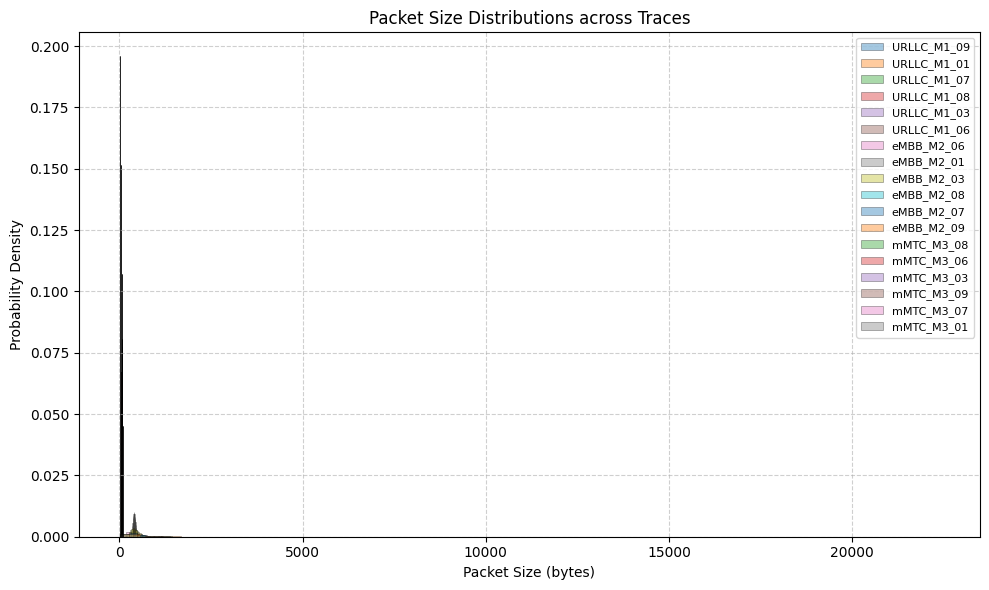

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

# ==========================================================
# Configuration
# ==========================================================
# Folder containing all *_trace_sec_test.csv files
data_folder = "../assets/New_traces"   # or specify your folder path
patterns = [
    "URLLC_M1_aligned_trace_sec_test_5_*.csv",
    "eMBB_M2_aligned_trace_sec_test_5_*.csv",
    "mMTC_M3_aligned_trace_sec_test_5_*.csv",
]

# ==========================================================
# Load and plot
# ==========================================================
plt.figure(figsize=(10, 6))

for pattern in patterns:
    for file_path in glob.glob(os.path.join(data_folder, pattern)):
        df = pd.read_csv(file_path)
        slice_name = os.path.basename(file_path).split("_aligned")[0]  # e.g., URLLC_M1
        scenario_id = file_path.split("_")[-1].replace(".csv", "")     # e.g., 5_01
        label = f"{slice_name}_{scenario_id}"

        # Filter valid packets
        packet_sizes = df["Length"]
        packet_sizes = packet_sizes[packet_sizes > 0]

        # Plot histogram (normalized density for comparability)
        plt.hist(packet_sizes, bins=40, alpha=0.4, density=True, label=label, edgecolor='black', linewidth=0.5)

plt.title("Packet Size Distributions across Traces")
plt.xlabel("Packet Size (bytes)")
plt.ylabel("Probability Density")
plt.legend(fontsize=8)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


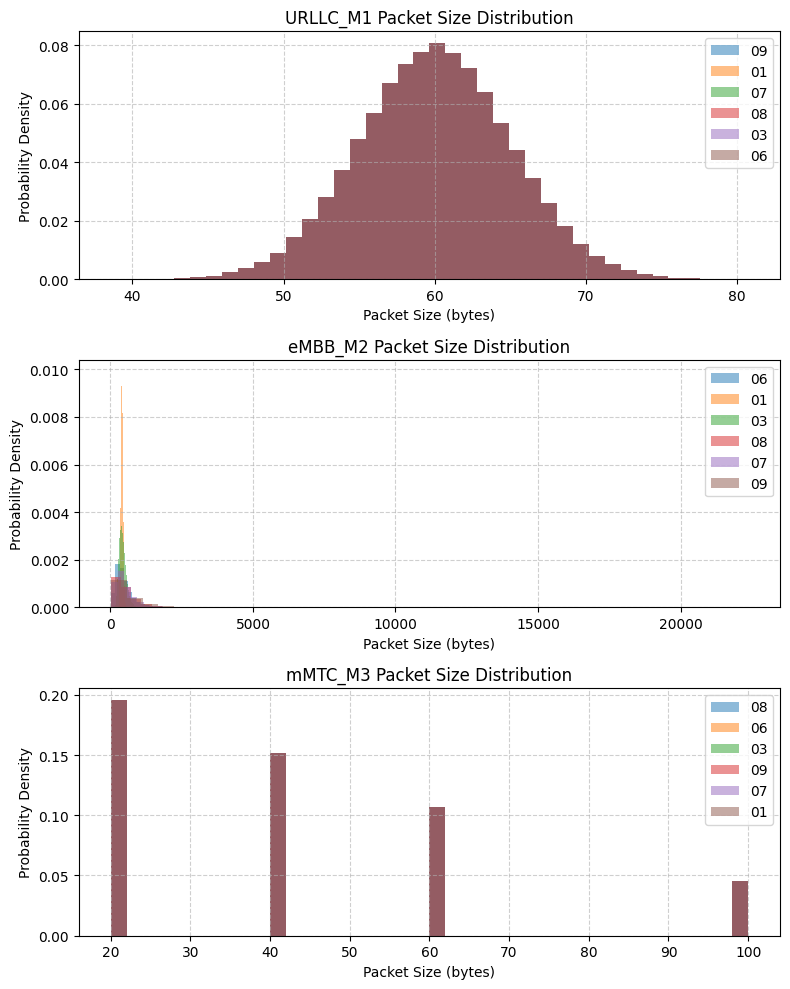

In [2]:
fig, axes = plt.subplots(3, 1, figsize=(8, 10))
slices = ["URLLC_M1", "eMBB_M2", "mMTC_M3"]
for ax, s in zip(axes, slices):
    for file_path in glob.glob(os.path.join(data_folder, f"{s}_aligned_trace_sec_test_5_*.csv")):
        df = pd.read_csv(file_path)
        packet_sizes = df["Length"][df["Length"] > 0]
        scenario = file_path.split("_")[-1].replace(".csv", "")
        ax.hist(packet_sizes, bins=40, alpha=0.5, density=True, label=scenario)
    ax.set_title(f"{s} Packet Size Distribution")
    ax.set_xlabel("Packet Size (bytes)")
    ax.set_ylabel("Probability Density")
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


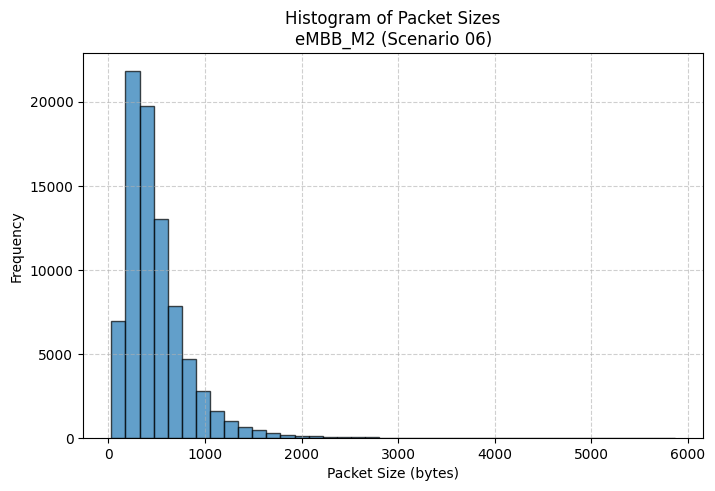

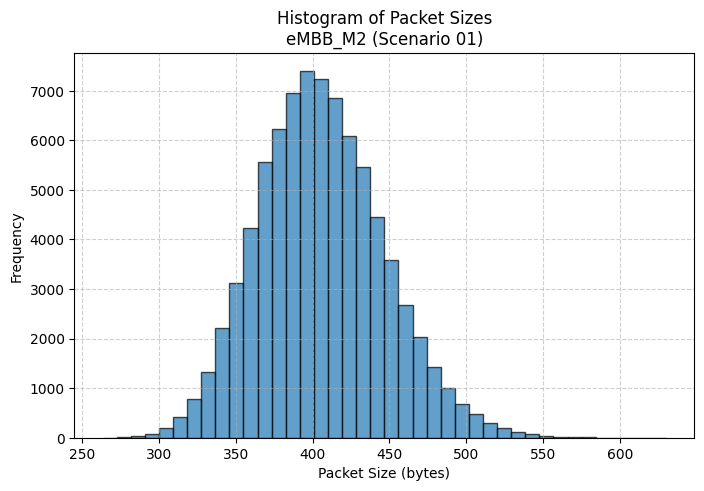

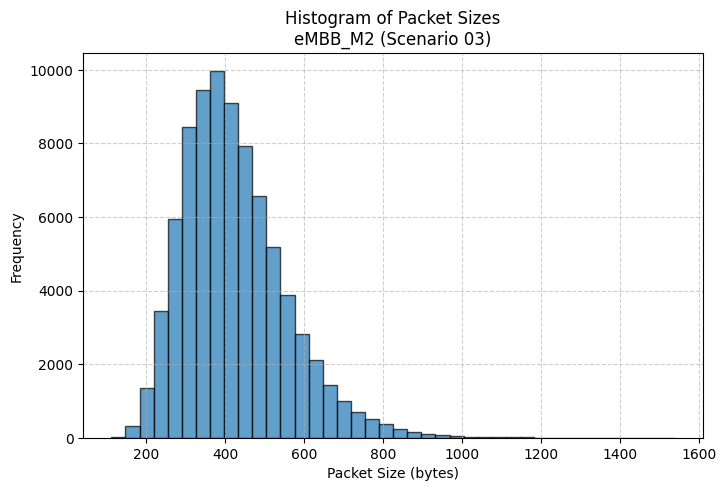

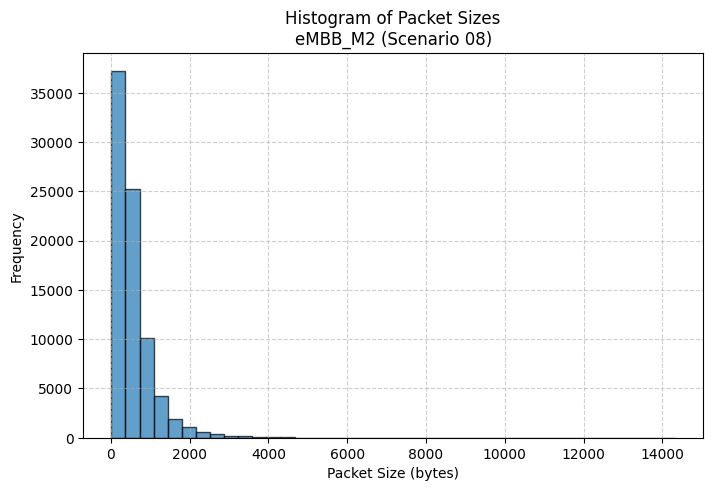

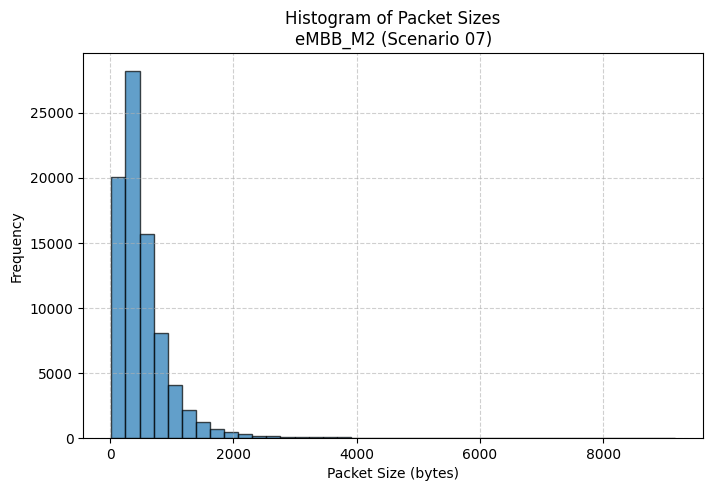

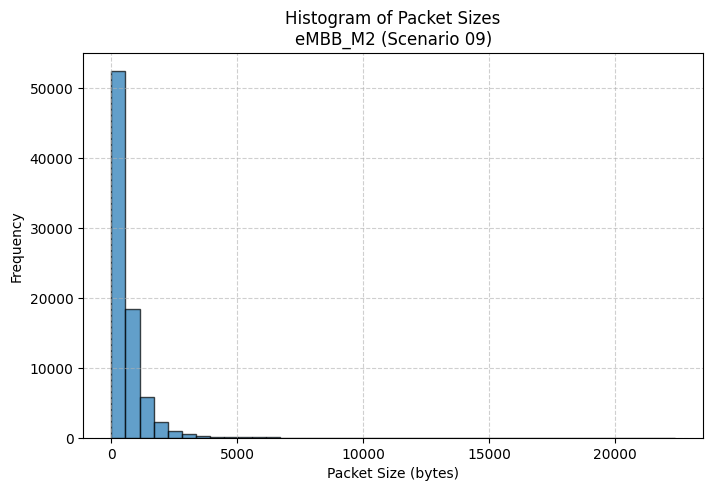

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

# ==========================================================
# Configuration
# ==========================================================
data_folder = "../assets/New_traces"   # folder where your CSVs are stored
patterns = [
    #"URLLC_M1_aligned_trace_sec_test_5_*.csv",
    "eMBB_M2_aligned_trace_sec_test_5_*.csv",
    #"mMTC_M3_aligned_trace_sec_test_5_*.csv",
]
save_plots = False   # set to False if you just want to show, not save

# ==========================================================
# Loop through files and plot individually
# ==========================================================
for pattern in patterns:
    for file_path in glob.glob(os.path.join(data_folder, pattern)):
        # Load
        df = pd.read_csv(file_path)

        # Extract experiment identifiers
        fname = os.path.basename(file_path)
        slice_name = fname.split("_aligned")[0]           # e.g., URLLC_M1
        scenario_id = fname.split("_")[-1].replace(".csv", "")  # e.g., 5_03

        # Filter packet sizes
        packet_sizes = df["Length"][df["Length"] > 0]

        # Create histogram
        plt.figure(figsize=(8, 5))
        plt.hist(packet_sizes, bins=40, edgecolor="black", alpha=0.7)
        plt.title(f"Histogram of Packet Sizes\n{slice_name} (Scenario {scenario_id})")
        plt.xlabel("Packet Size (bytes)")
        plt.ylabel("Frequency")
        plt.grid(True, linestyle="--", alpha=0.6)

        if save_plots:
            out_name = f"hist_{slice_name}_{scenario_id}.png"
            plt.savefig(out_name, dpi=300, bbox_inches="tight")
            print(f"✅ Saved: {out_name}")
            plt.close()
        else:
            plt.show()


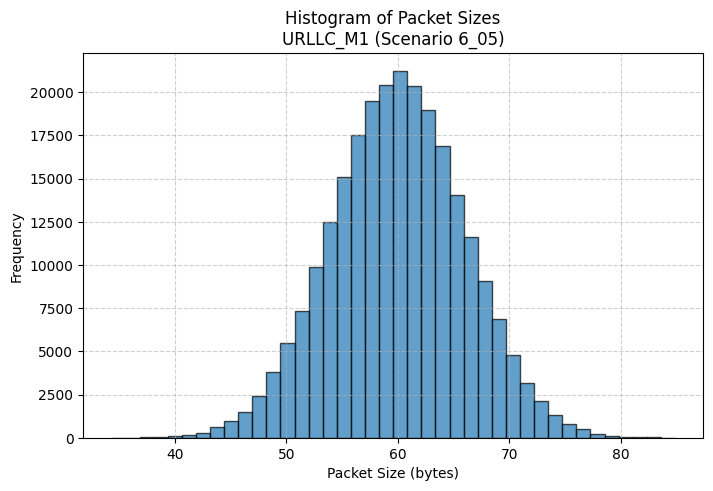

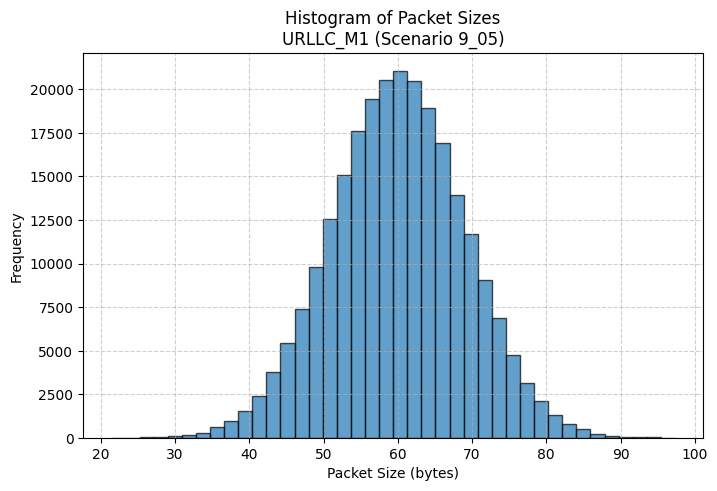

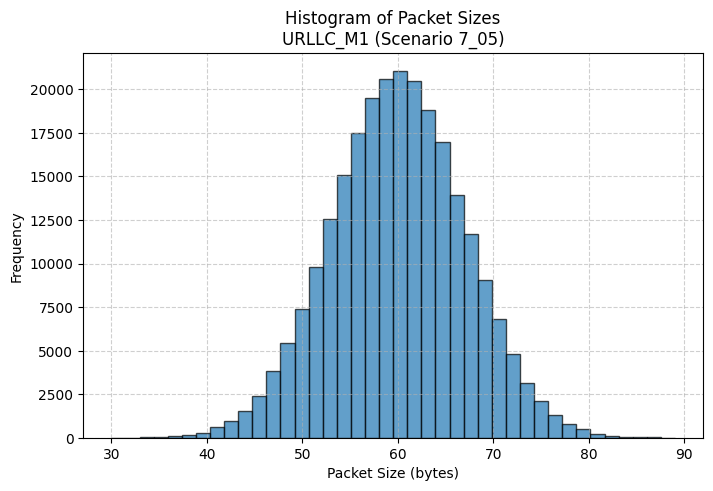

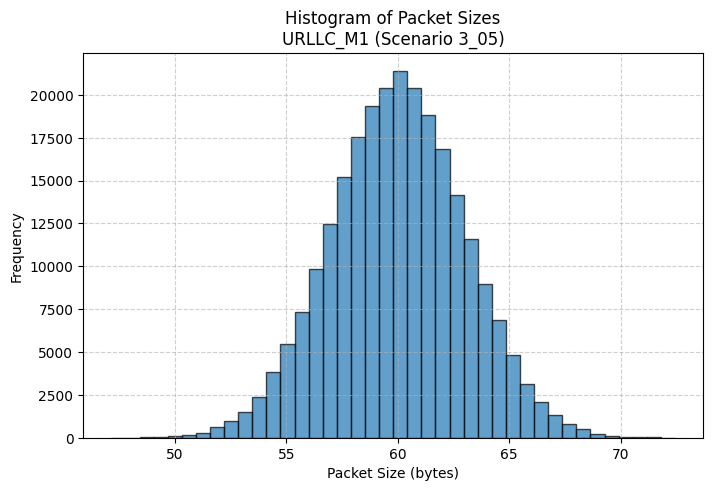

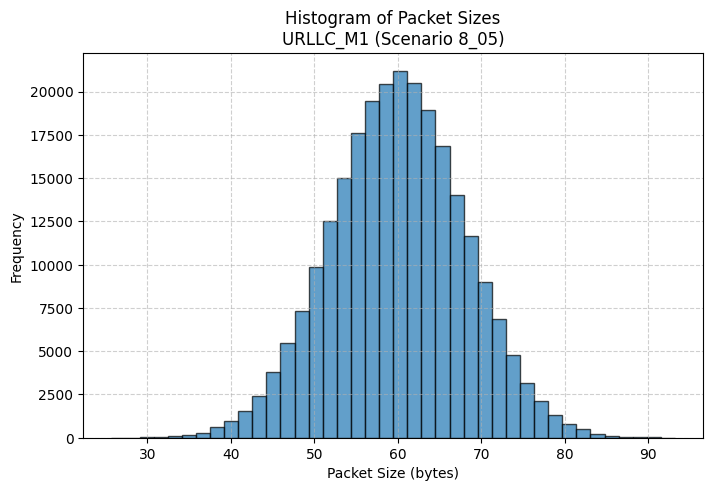

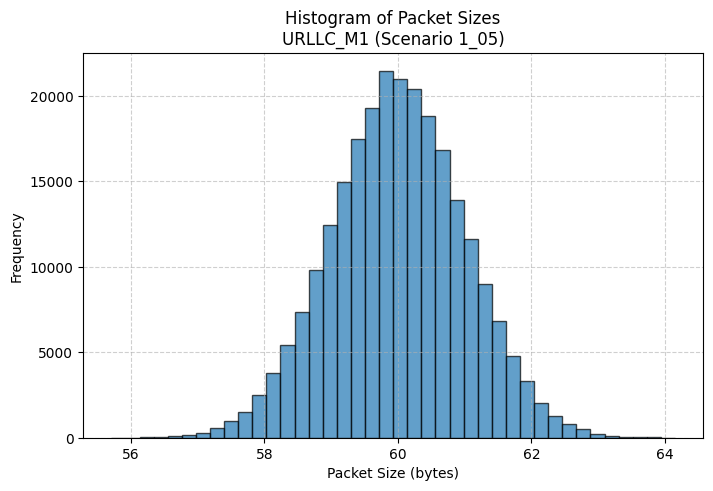

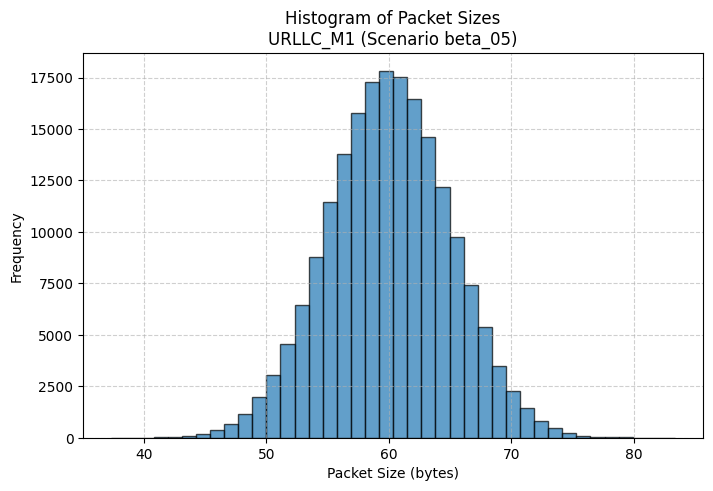

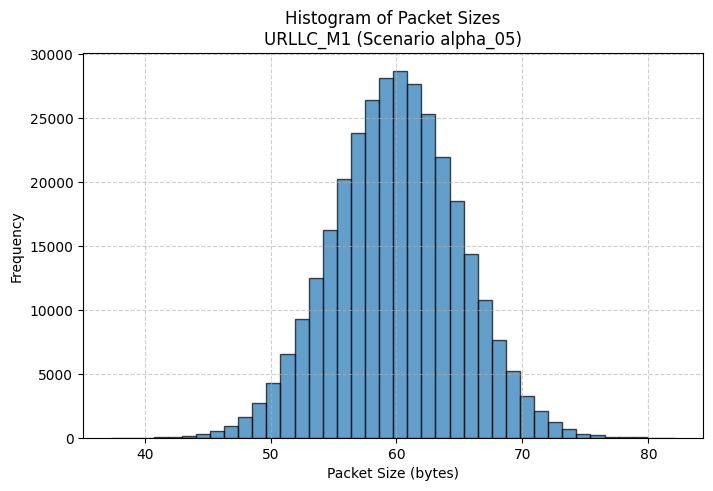

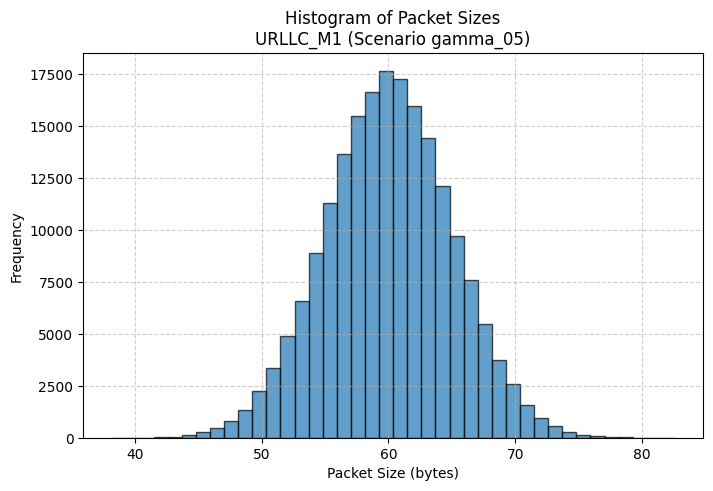

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

# ==========================================================
# Configuration
# ==========================================================
data_folder = "../assets/New_traces"   # folder where your CSVs are located
patterns = [
    "URLLC_M1_aligned_trace_sec_test_*_05.csv",
    #"eMBB_M2_aligned_trace_sec_test_*_05.csv",
    #"mMTC_M3_aligned_trace_sec_test_*_05.csv",
]
save_plots = False   # Set to False to only display plots

# Optional: folder to save figures
output_folder = "plots"
os.makedirs(output_folder, exist_ok=True)

# ==========================================================
# Generate separate histogram for each file
# ==========================================================
for pattern in patterns:
    for file_path in glob.glob(os.path.join(data_folder, pattern)):
        df = pd.read_csv(file_path)
        fname = os.path.basename(file_path)

        # Extract parts for labeling
        slice_name = fname.split("_aligned")[0]  # e.g., URLLC_M1
        scenario_tag = fname.split("test_")[-1].replace(".csv", "")  # e.g., 5_05 or 9_05
        label = f"{slice_name}_{scenario_tag}"

        # Filter and plot packet sizes
        packet_sizes = df["Length"][df["Length"] > 0]

        plt.figure(figsize=(8, 5))
        plt.hist(packet_sizes, bins=40, edgecolor="black", alpha=0.7)
        plt.title(f"Histogram of Packet Sizes\n{slice_name} (Scenario {scenario_tag})")
        plt.xlabel("Packet Size (bytes)")
        plt.ylabel("Frequency")
        plt.grid(True, linestyle="--", alpha=0.6)

        if save_plots:
            out_name = os.path.join(output_folder, f"hist_{label}.png")
            plt.savefig(out_name, dpi=300, bbox_inches="tight")
            print(f"✅ Saved: {out_name}")
            plt.close()
        else:
            plt.show()



URLLC_M1_6_05: total packets = 249714, mean = 60.00, std = 6.00


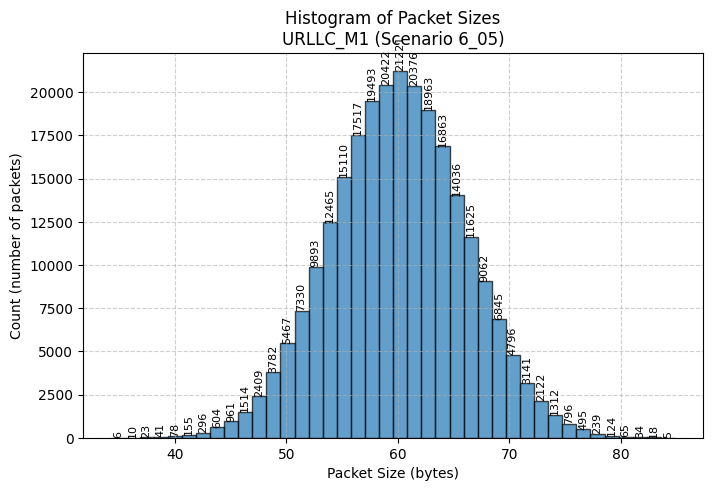

URLLC_M1_9_05: total packets = 249714, mean = 60.00, std = 9.00


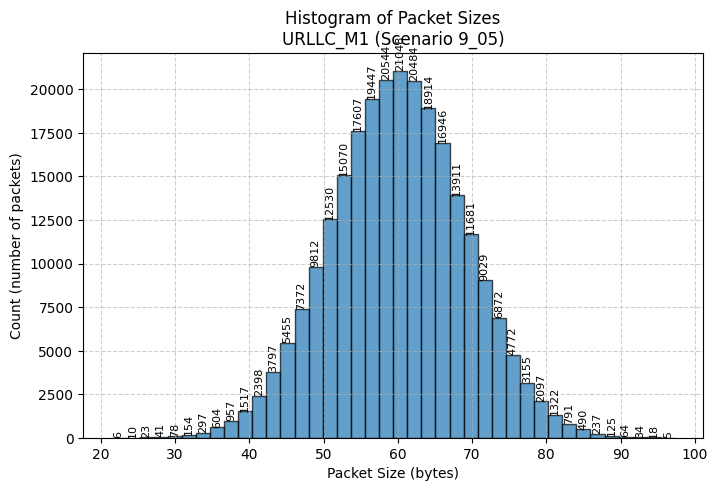

URLLC_M1_7_05: total packets = 249714, mean = 60.00, std = 7.00


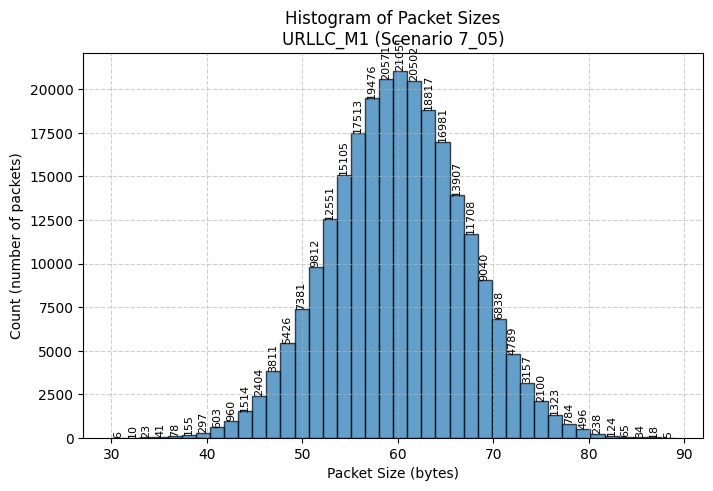

URLLC_M1_3_05: total packets = 249714, mean = 60.00, std = 3.00


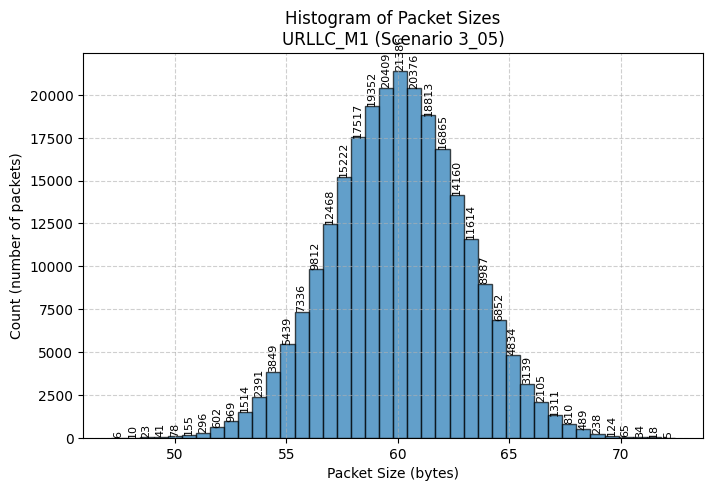

URLLC_M1_8_05: total packets = 249714, mean = 60.00, std = 8.00


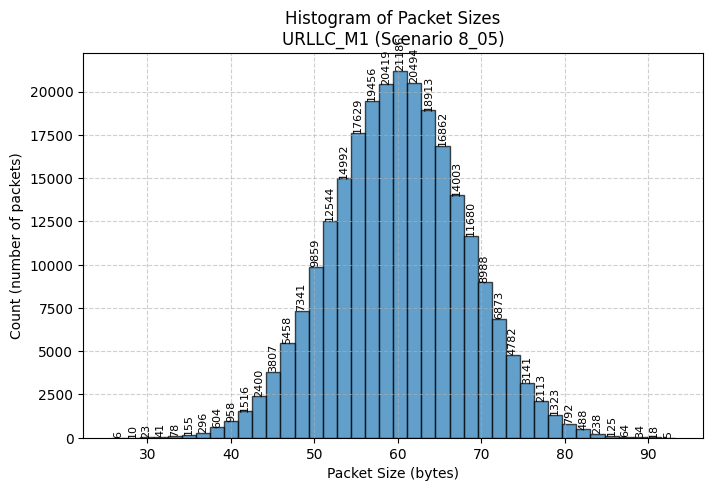

URLLC_M1_1_05: total packets = 249714, mean = 60.00, std = 1.00


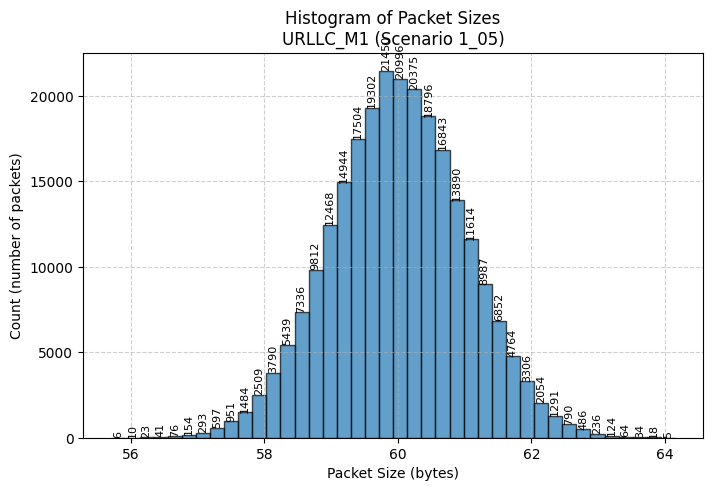

URLLC_M1_beta_05: total packets = 195703, mean = 59.99, std = 5.00


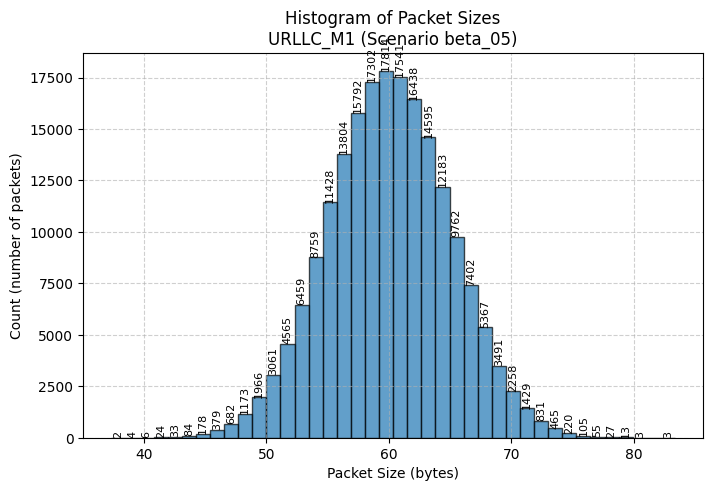

URLLC_M1_alpha_05: total packets = 322118, mean = 60.00, std = 5.00


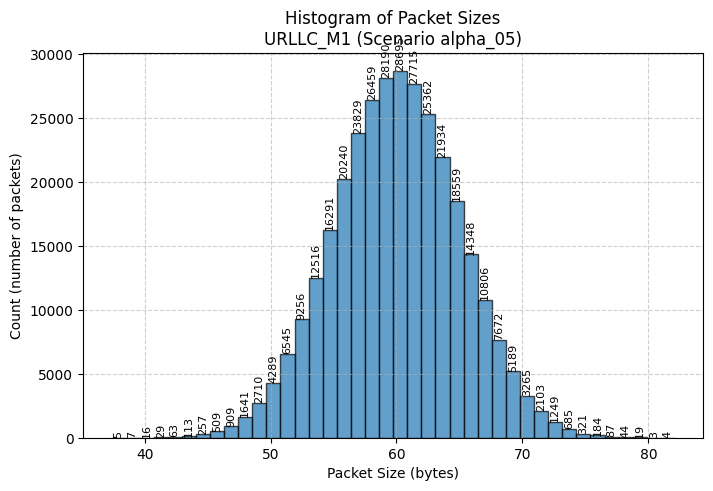

URLLC_M1_gamma_05: total packets = 196101, mean = 60.01, std = 4.98


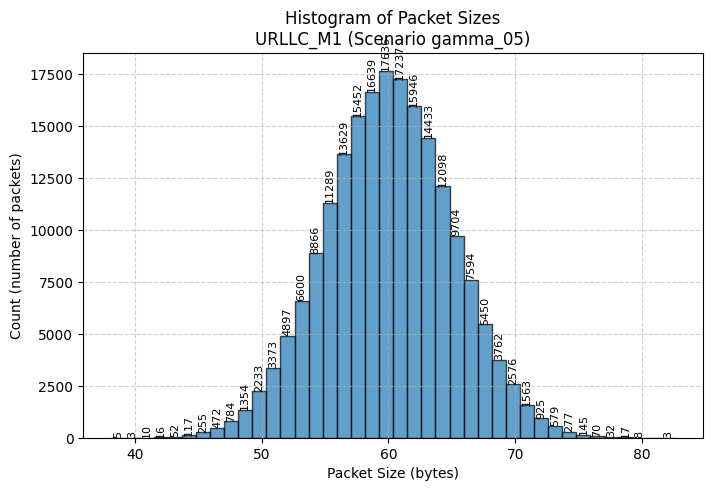

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
import numpy as np

# ==========================================================
# Configuration
# ==========================================================
data_folder = "../assets/New_traces"   # folder where your CSVs are located
patterns = [
    "URLLC_M1_aligned_trace_sec_test_*_05.csv",
    # "eMBB_M2_aligned_trace_sec_test_*_05.csv",
    # "mMTC_M3_aligned_trace_sec_test_*_05.csv",
]
save_plots = False   # Set to False to only display plots

# Optional: folder to save figures
output_folder = "plots"
os.makedirs(output_folder, exist_ok=True)

# ==========================================================
# Generate separate histogram for each file
# ==========================================================
for pattern in patterns:
    for file_path in glob.glob(os.path.join(data_folder, pattern)):
        df = pd.read_csv(file_path)
        fname = os.path.basename(file_path)

        # Extract parts for labeling
        slice_name = fname.split("_aligned")[0]  # e.g., URLLC_M1
        scenario_tag = fname.split("test_")[-1].replace(".csv", "")  # e.g., 5_05 or 9_05
        label = f"{slice_name}_{scenario_tag}"

        # Filter and plot packet sizes
        packet_sizes = df["Length"][df["Length"] > 0]

        plt.figure(figsize=(8, 5))

        # Draw histogram and get counts per bin
        counts, bins, patches = plt.hist(packet_sizes, bins=40, edgecolor="black", alpha=0.7)

        # Annotate counts on top of each bar (only for nonzero bins)
        for count, x_left, x_right in zip(counts, bins[:-1], bins[1:]):
            if count > 0:
                plt.text(
                    (x_left + x_right) / 2,  # x-position (middle of the bar)
                    count + 0.5,             # y-position (slightly above bar)
                    f"{int(count)}",         # label text
                    ha='center', va='bottom', fontsize=8, rotation=90
                )

        plt.title(f"Histogram of Packet Sizes\n{slice_name} (Scenario {scenario_tag})")
        plt.xlabel("Packet Size (bytes)")
        plt.ylabel("Count (number of packets)")
        plt.grid(True, linestyle="--", alpha=0.6)

        # Optional: show summary in the title or print
        print(f"{label}: total packets = {len(packet_sizes)}, mean = {packet_sizes.mean():.2f}, std = {packet_sizes.std():.2f}")

        if save_plots:
            out_name = os.path.join(output_folder, f"hist_{label}.png")
            plt.savefig(out_name, dpi=300, bbox_inches="tight")
            print(f"✅ Saved: {out_name}")
            plt.close()
        else:
            plt.show()


URLLC_M1_6_05: total packets = 249714, mean = 60.00, std = 6.00


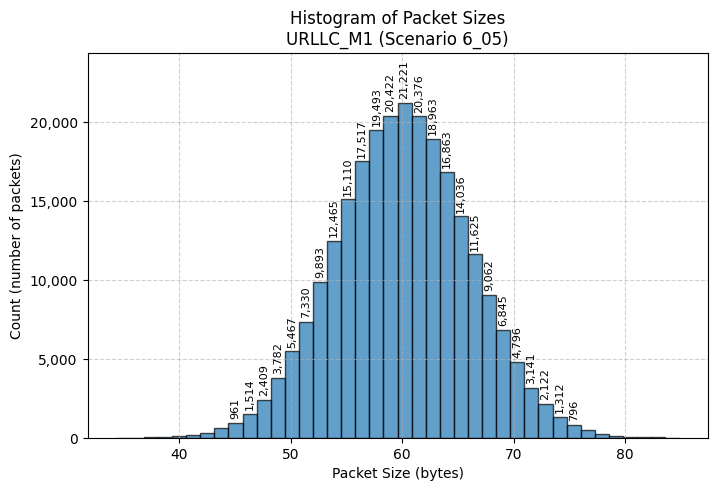

URLLC_M1_9_05: total packets = 249714, mean = 60.00, std = 9.00


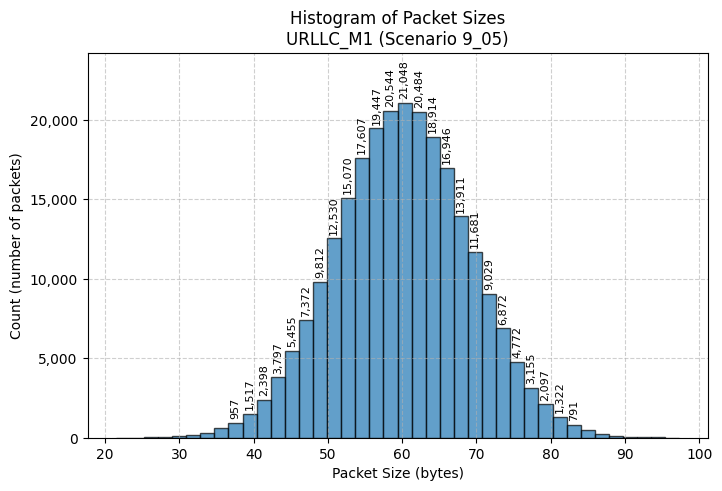

URLLC_M1_7_05: total packets = 249714, mean = 60.00, std = 7.00


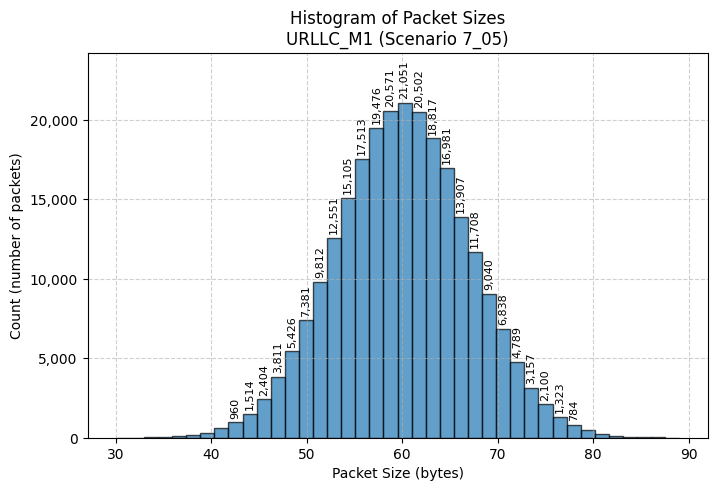

URLLC_M1_3_05: total packets = 249714, mean = 60.00, std = 3.00


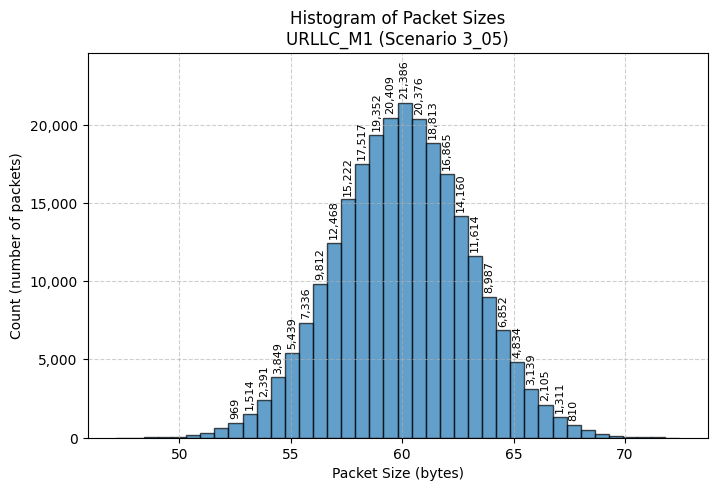

URLLC_M1_8_05: total packets = 249714, mean = 60.00, std = 8.00


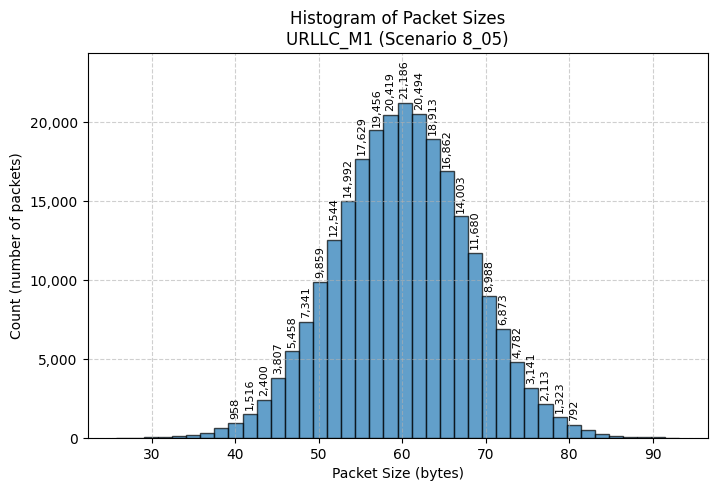

URLLC_M1_1_05: total packets = 249714, mean = 60.00, std = 1.00


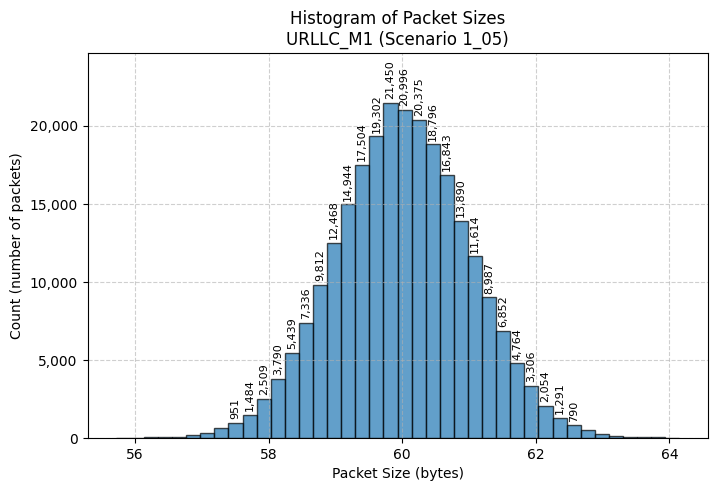

URLLC_M1_beta_05: total packets = 195703, mean = 59.99, std = 5.00


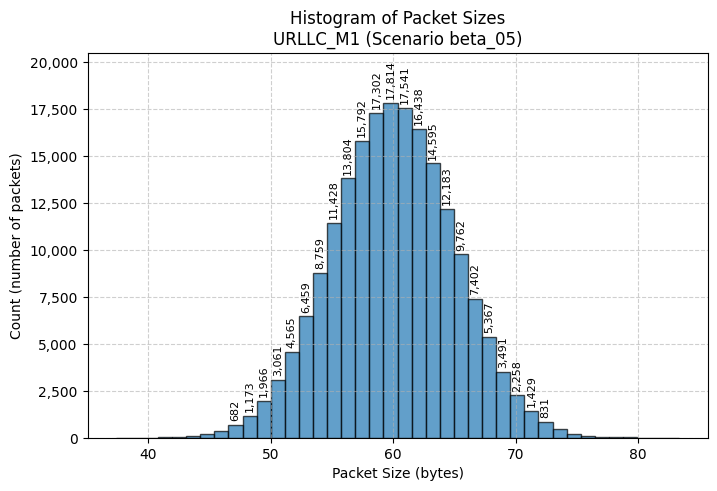

URLLC_M1_alpha_05: total packets = 322118, mean = 60.00, std = 5.00


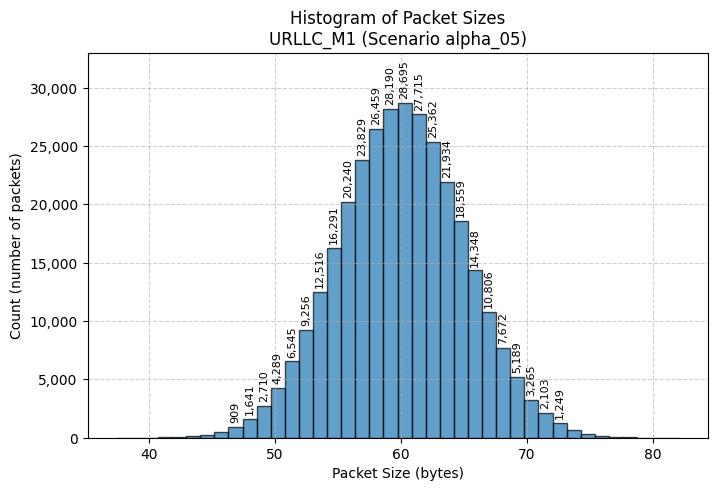

URLLC_M1_gamma_05: total packets = 196101, mean = 60.01, std = 4.98


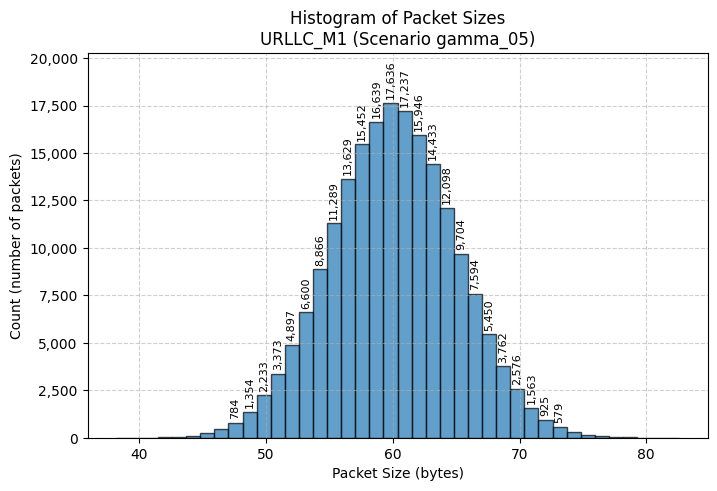

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import glob
import os
import numpy as np

# ==========================================================
# Configuration
# ==========================================================
data_folder = "../assets/New_traces"   # folder where your CSVs are located
patterns = [
    "URLLC_M1_aligned_trace_sec_test_*_05.csv",
    # "eMBB_M2_aligned_trace_sec_test_*_05.csv",
    # "mMTC_M3_aligned_trace_sec_test_*_05.csv",
]
save_plots = False   # Set to False to only display plots

# Optional: folder to save figures
output_folder = "plots"
os.makedirs(output_folder, exist_ok=True)

# ==========================================================
# Generate separate histogram for each file
# ==========================================================
for pattern in patterns:
    for file_path in glob.glob(os.path.join(data_folder, pattern)):
        df = pd.read_csv(file_path)
        fname = os.path.basename(file_path)

        # Extract parts for labeling
        slice_name = fname.split("_aligned")[0]  # e.g., URLLC_M1
        scenario_tag = fname.split("test_")[-1].replace(".csv", "")  # e.g., 7_05
        label = f"{slice_name}_{scenario_tag}"

        # Filter and plot packet sizes
        packet_sizes = df["Length"][df["Length"] > 0]

        # Plot setup
        fig, ax = plt.subplots(figsize=(8, 5))
        counts, bins, patches = ax.hist(packet_sizes, bins=40, edgecolor="black", alpha=0.7)

        # Adjust y-limit for labels
        ax.set_ylim(0, counts.max() * 1.15)
        ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

        # Label settings (tune for density)
        min_frac_of_max = 0.03   # only label bins >= 3% of max height
        label_every = 1          # label every bin (use 2 or 3 to thin)
        rotation_deg = 90        # rotate labels vertically

        # Add labels on bars
        eligible = 0
        for i, (h, patch) in enumerate(zip(counts, patches)):
            if h == 0 or h < min_frac_of_max * counts.max():
                continue
            eligible += 1
            if eligible % label_every != 0:
                continue
            x = patch.get_x() + patch.get_width() / 2.0
            ax.annotate(
                f"{int(h):,}",             # formatted with commas
                xy=(x, h),
                xytext=(0, 3),
                textcoords="offset points",
                ha="center", va="bottom",
                rotation=rotation_deg,
                fontsize=8,
                clip_on=True,
            )

        # Titles and labels
        ax.set_title(f"Histogram of Packet Sizes\n{slice_name} (Scenario {scenario_tag})")
        ax.set_xlabel("Packet Size (bytes)")
        ax.set_ylabel("Count (number of packets)")
        ax.grid(True, linestyle="--", alpha=0.6)

        # Print summary stats to console
        print(f"{label}: total packets = {len(packet_sizes)}, "
              f"mean = {packet_sizes.mean():.2f}, std = {packet_sizes.std():.2f}")

        # Save or show
        if save_plots:
            out_name = os.path.join(output_folder, f"hist_{label}.png")
            fig.savefig(out_name, dpi=300, bbox_inches="tight")
            print(f"✅ Saved: {out_name}")
            plt.close(fig)
        else:
            plt.show()


### New Plots

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import glob
import os

In [3]:
# ======================================================
# Configuration
# ======================================================
trace_folder = "."   # where CSVs are located (same as generator output)
machines = ["M1", "M2", "M3"]
slices = ["URLLC", "eMBB", "mMTC"]
plt.rcParams["figure.figsize"] = (10, 4)
sns.set(style="whitegrid")

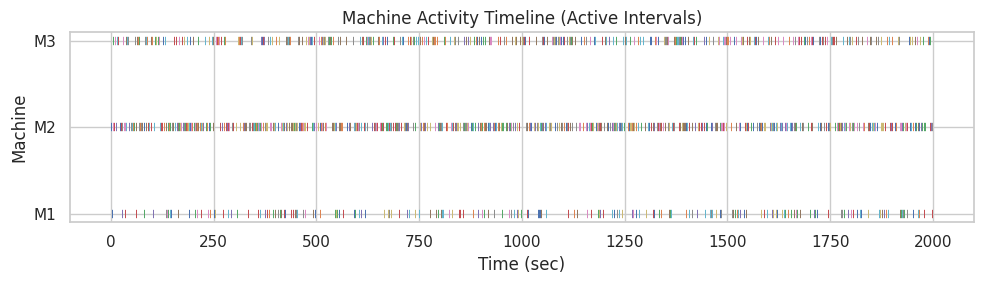

In [5]:
# ======================================================
# 1. Machine Activity Plot (Timeline)
# ======================================================
activity_df = pd.read_csv("ue_activity_intervals_sec_test.csv")

plt.figure(figsize=(10, 3))
for i, (machine, group) in enumerate(activity_df.groupby("machine")):
    for _, row in group.iterrows():
        plt.plot([row["start_ms"], row["end_ms"]],
                 [i, i],
                 linewidth=6, solid_capstyle="butt")
plt.yticks(range(len(activity_df["machine"].unique())), activity_df["machine"].unique())
plt.xlabel("Time (sec)")
plt.ylabel("Machine")
plt.title("Machine Activity Timeline (Active Intervals)")
plt.tight_layout()
plt.show()



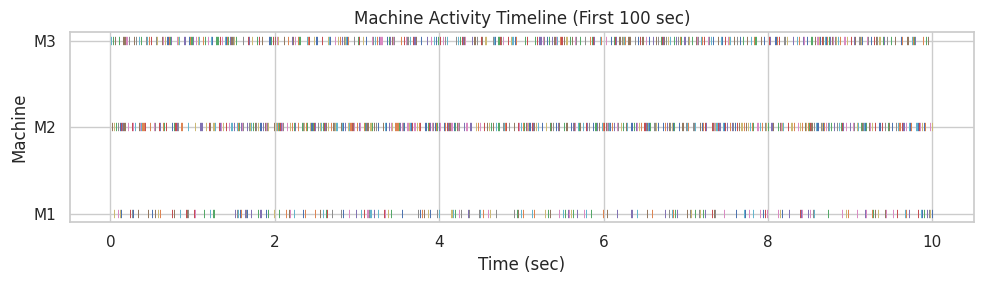

In [10]:
# Machine Activity Timeline (Zoomed)
activity_df = pd.read_csv("ue_activity_intervals_sec_test.csv")

# Filter to first 100 seconds
activity_zoom = activity_df[activity_df["start_ms"] <= 10]

plt.figure(figsize=(10, 3))
for i, (machine, group) in enumerate(activity_zoom.groupby("machine")):
    for _, row in group.iterrows():
        plt.plot([row["start_ms"], row["end_ms"]],
                 [i, i], linewidth=6, solid_capstyle="butt")
plt.yticks(range(len(activity_zoom["machine"].unique())), activity_zoom["machine"].unique())
plt.xlabel("Time (sec)")
plt.ylabel("Machine")
plt.title("Machine Activity Timeline (First 100 sec)")
plt.tight_layout()
plt.show()


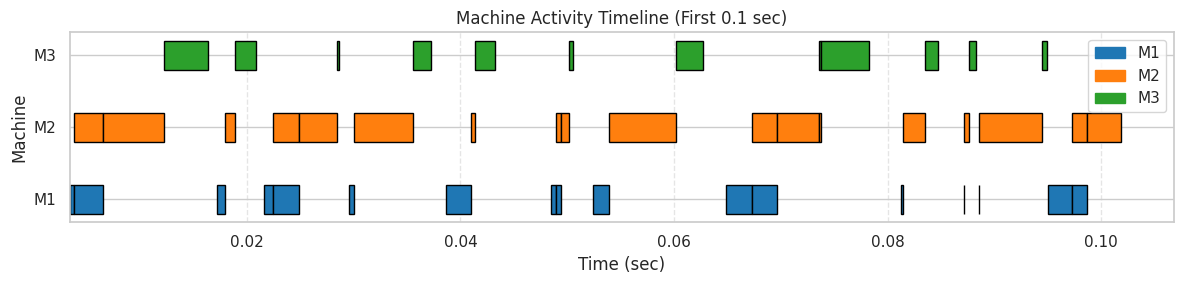

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Load intervals (already in seconds)
activity_df = pd.read_csv("ue_activity_intervals_sec_test.csv")

# --- zoom window (set as you like) ---
ZOOM_END = 0.1     # seconds (for first 10 s)
activity_df = activity_df[activity_df["start_ms"] <= ZOOM_END]

# --- Assign colors per machine ---
machine_colors = {
    "M1": "#1f77b4",  # blue
    "M2": "#ff7f0e",  # orange
    "M3": "#2ca02c",  # green
}

plt.figure(figsize=(12, 3))
for i, (machine, group) in enumerate(sorted(activity_df.groupby("machine"))):
    for _, row in group.iterrows():
        plt.barh(
            y=i,
            width=row["end_ms"] - row["start_ms"],
            left=row["start_ms"],
            color=machine_colors.get(machine, "gray"),
            edgecolor="black",
            height=0.4,
        )

# --- Formatting ---
plt.yticks(range(len(machine_colors)), machine_colors.keys())
plt.xlabel("Time (sec)")
plt.ylabel("Machine")
plt.title(f"Machine Activity Timeline (First {ZOOM_END} sec)")
plt.grid(True, axis="x", linestyle="--", alpha=0.5)
plt.tight_layout()

# Legend
handles = [mpatches.Patch(color=c, label=m) for m, c in machine_colors.items()]
plt.legend(handles=handles, loc="upper right")

plt.show()


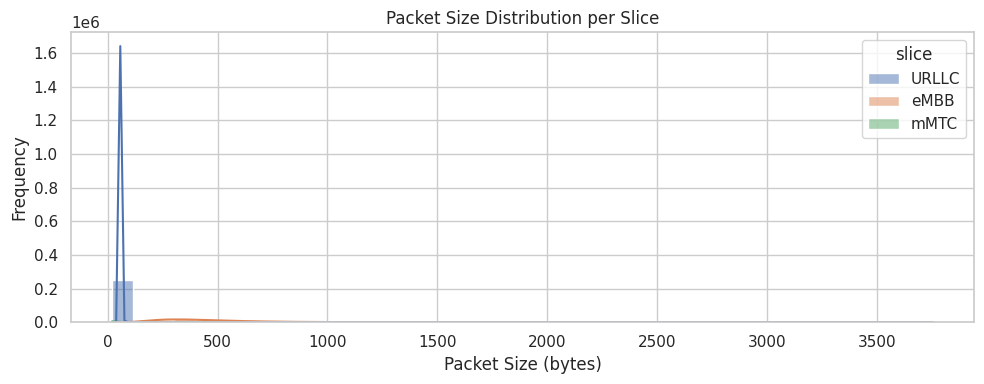

In [6]:
# ======================================================
# 2. Packet Size Distribution per Slice
# ======================================================
trace_df = pd.read_csv("all_traces_sec_test.csv")

plt.figure(figsize=(10, 4))
sns.histplot(data=trace_df, x="Length", hue="slice", bins=40, kde=True)
plt.title("Packet Size Distribution per Slice")
plt.xlabel("Packet Size (bytes)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()



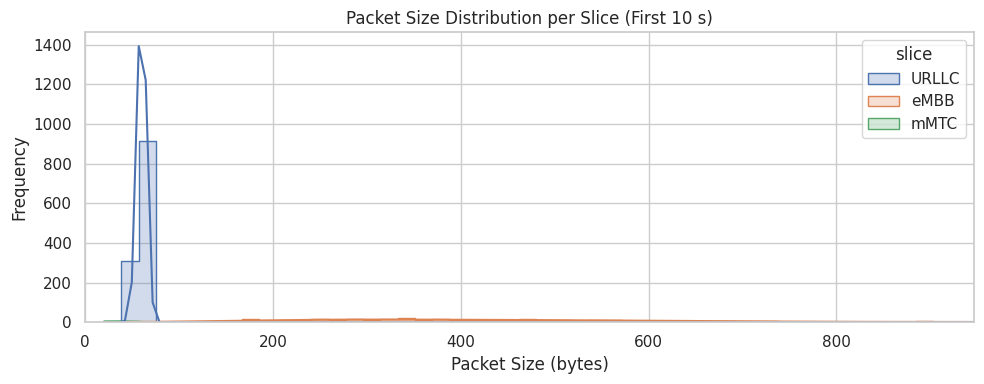

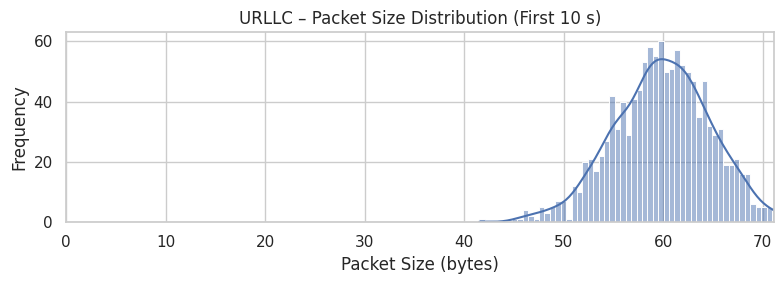

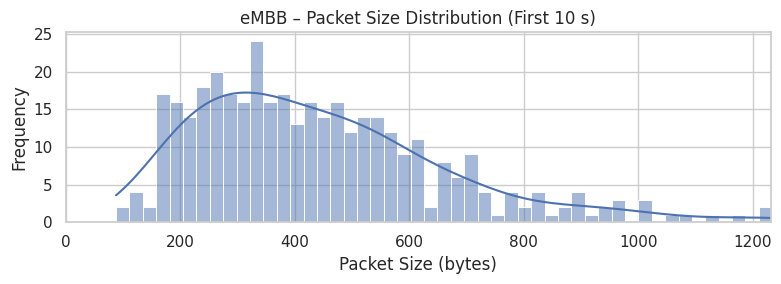

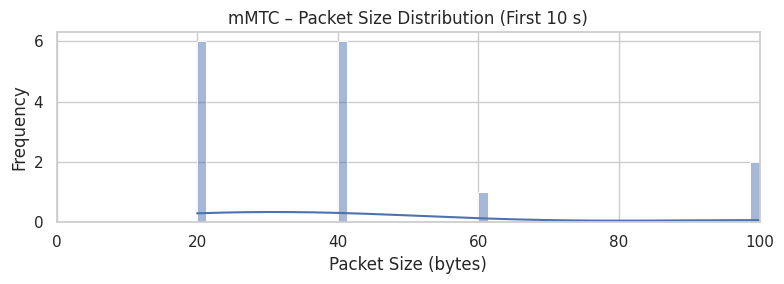

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

trace_df = pd.read_csv("all_traces_sec_test.csv")

# --- zoom window ---
ZOOM_END = 10  # seconds, same as activity plot
trace_zoom = trace_df[trace_df["Time"] <= ZOOM_END]

# --- combined distribution (all slices together) ---
plt.figure(figsize=(10, 4))
sns.histplot(data=trace_zoom, x="Length", hue="slice", bins=80, kde=True, element="step")
plt.title(f"Packet Size Distribution per Slice (First {ZOOM_END} s)")
plt.xlabel("Packet Size (bytes)")
plt.ylabel("Frequency")
plt.xlim(0, trace_zoom["Length"].quantile(0.99))  # cut off extreme tail
plt.tight_layout()
plt.show()

# --- per-slice distributions separately ---
for slice_type, group in trace_zoom.groupby("slice"):
    plt.figure(figsize=(8, 3))
    sns.histplot(group["Length"], bins=60, kde=True, color="C0")
    plt.title(f"{slice_type} – Packet Size Distribution (First {ZOOM_END} s)")
    plt.xlabel("Packet Size (bytes)")
    plt.ylabel("Frequency")
    plt.xlim(0, group["Length"].quantile(0.99))
    plt.tight_layout()
    plt.show()


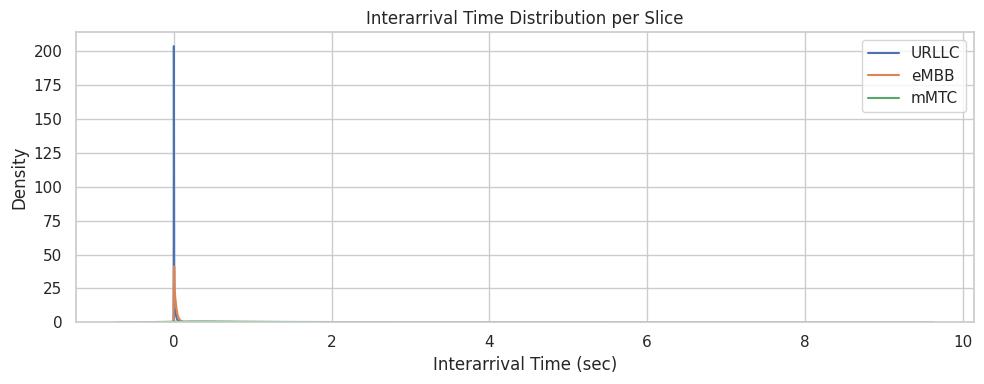

In [15]:
# ======================================================
# 3. Interarrival Time Distributions
# ======================================================
plt.figure(figsize=(10, 4))
for slice_type, group in trace_df.groupby("slice"):
    # compute per-machine interarrivals
    interarrivals = []
    for _, g in group.groupby("machine"):
        times = np.sort(g["Time"].values)
        if len(times) > 1:
            interarrivals.extend(np.diff(times))
    sns.kdeplot(interarrivals, label=slice_type)
plt.title("Interarrival Time Distribution per Slice")
plt.xlabel("Interarrival Time (sec)")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()

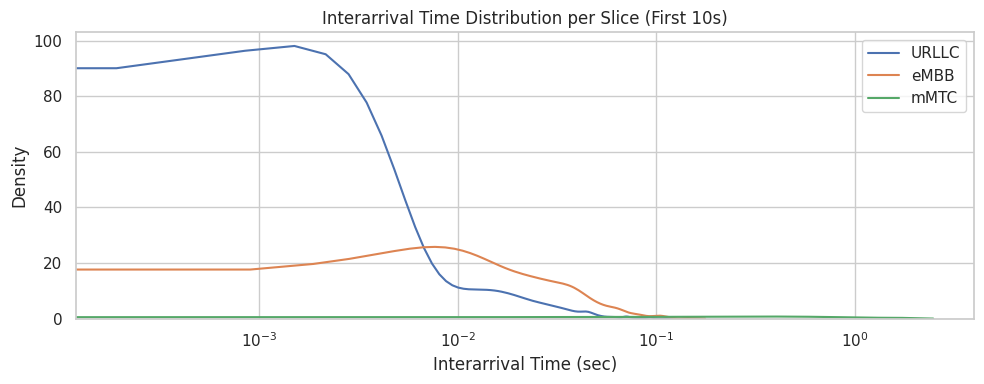

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(10, 4))
for slice_type, group in trace_zoom.groupby("slice"):
    interarrivals = []
    for _, g in group.groupby("machine"):
        times = np.sort(g["Time"].values)
        if len(times) > 1:
            interarrivals.extend(np.diff(times))
    # log scale helps separate sub-ms vs multi-s values
    sns.kdeplot(interarrivals, label=slice_type, bw_adjust=0.8)
plt.title(f"Interarrival Time Distribution per Slice (First {ZOOM_END}s)")
plt.xlabel("Interarrival Time (sec)")
plt.ylabel("Density")
plt.xscale("log")
plt.legend()
plt.tight_layout()
plt.show()


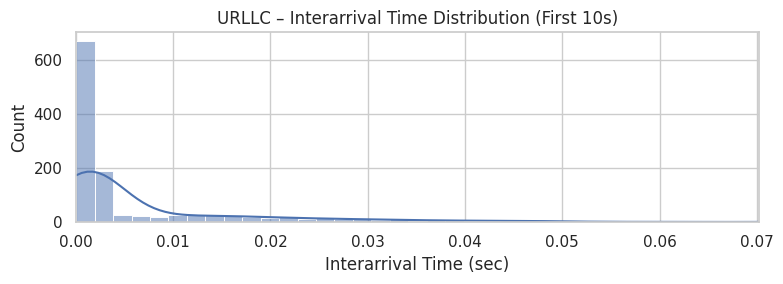

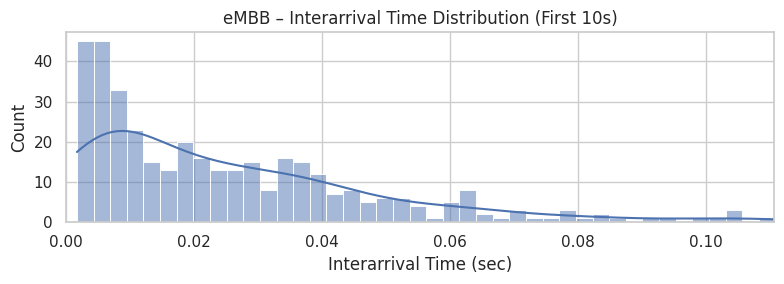

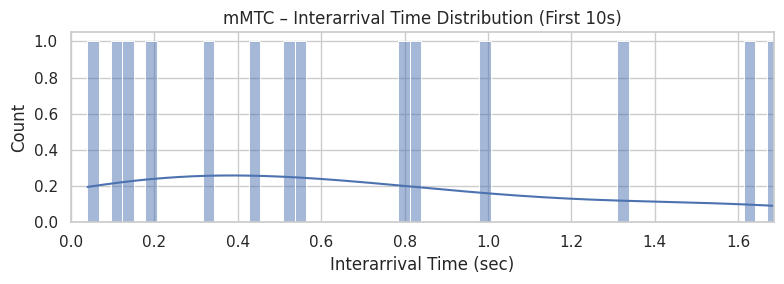

In [17]:
for slice_type, group in trace_zoom.groupby("slice"):
    interarrivals = []
    for _, g in group.groupby("machine"):
        times = np.sort(g["Time"].values)
        if len(times) > 1:
            interarrivals.extend(np.diff(times))
    plt.figure(figsize=(8,3))
    sns.histplot(interarrivals, bins=60, kde=True, color="C0")
    plt.title(f"{slice_type} – Interarrival Time Distribution (First {ZOOM_END}s)")
    plt.xlabel("Interarrival Time (sec)")
    plt.xlim(0, np.percentile(interarrivals, 99))  # zoom to main body
    plt.tight_layout()
    plt.show()


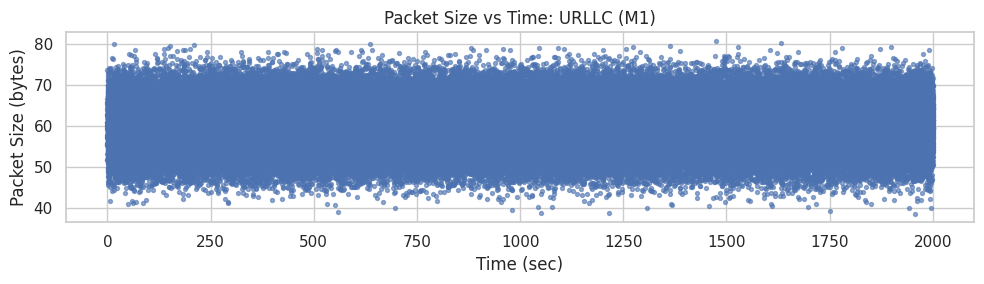

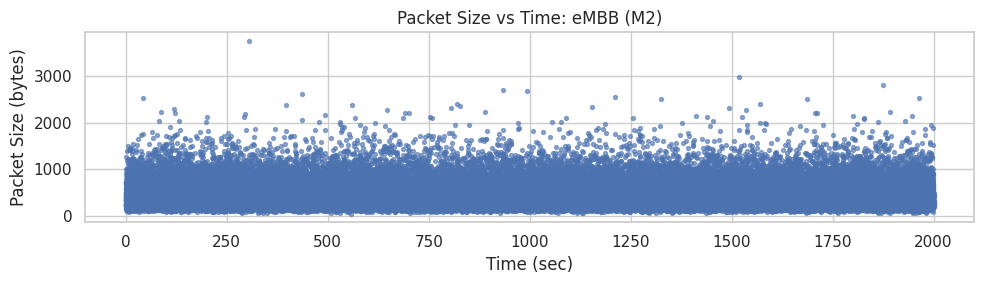

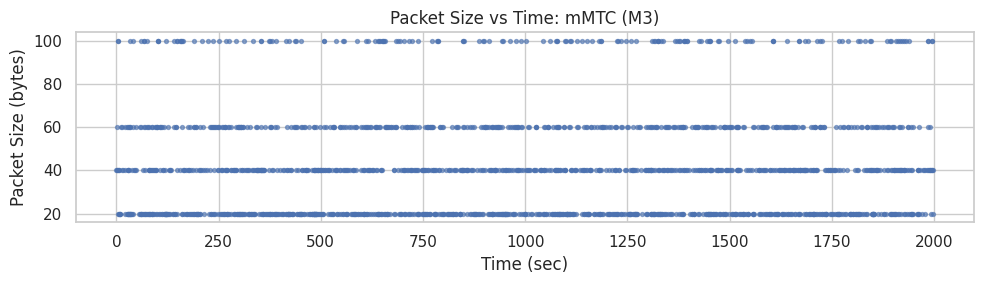

In [8]:
# ======================================================
# 4. Packet Size vs Time (per Machine)
# ======================================================
for (slice_type, machine), group in trace_df.groupby(["slice", "machine"]):
    plt.figure(figsize=(10, 3))
    plt.scatter(group["Time"], group["Length"], s=8, alpha=0.6)
    plt.title(f"Packet Size vs Time: {slice_type} ({machine})")
    plt.xlabel("Time (sec)")
    plt.ylabel("Packet Size (bytes)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

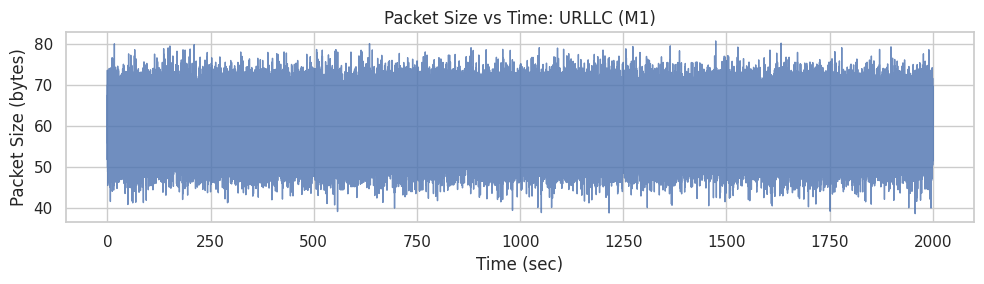

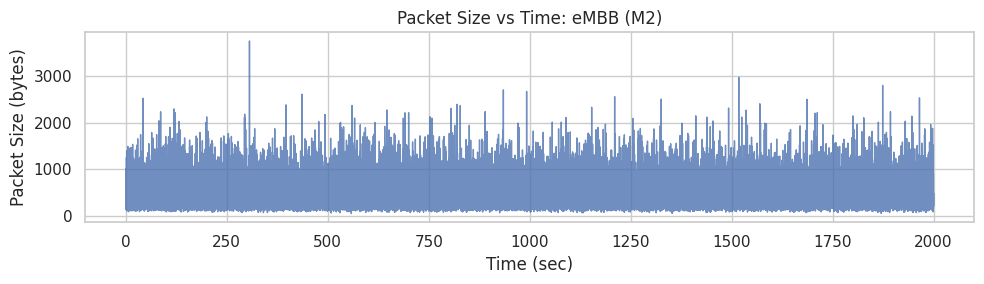

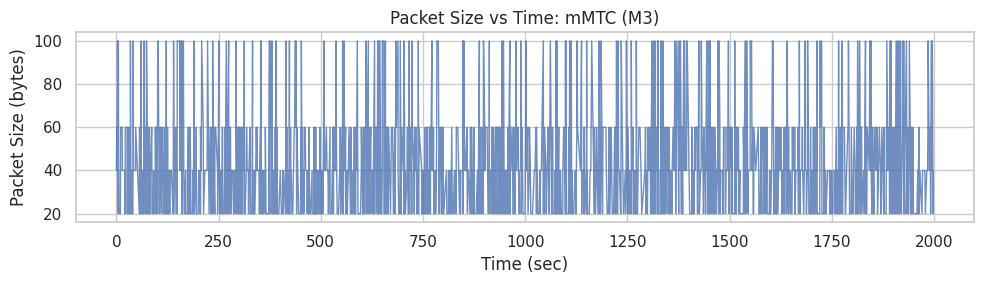

In [22]:
# ======================================================
# 4. Packet Size vs Time (per Machine) – Continuous version
# ======================================================
for (slice_type, machine), group in trace_df.groupby(["slice", "machine"]):
    group = group.sort_values("Time")  # make sure time is ordered
    plt.figure(figsize=(10, 3))
    plt.plot(group["Time"], group["Length"], linewidth=1.0, alpha=0.8)
    plt.title(f"Packet Size vs Time: {slice_type} ({machine})")
    plt.xlabel("Time (sec)")
    plt.ylabel("Packet Size (bytes)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


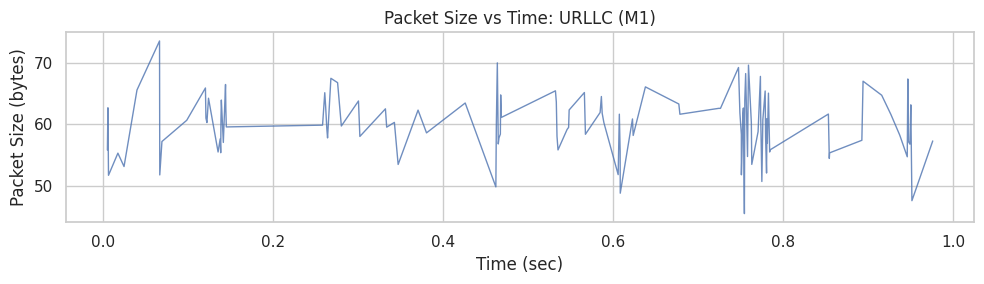

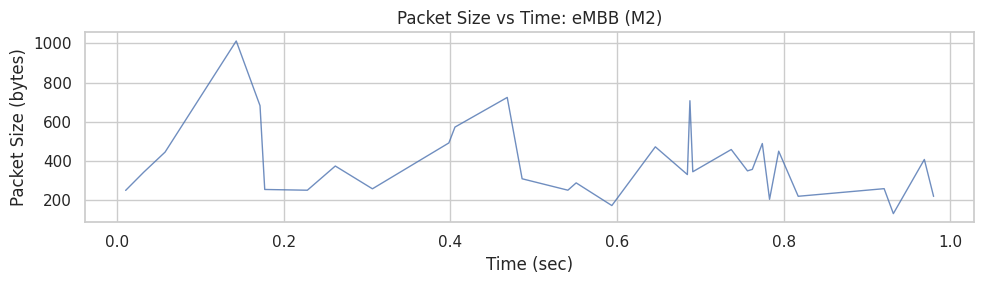

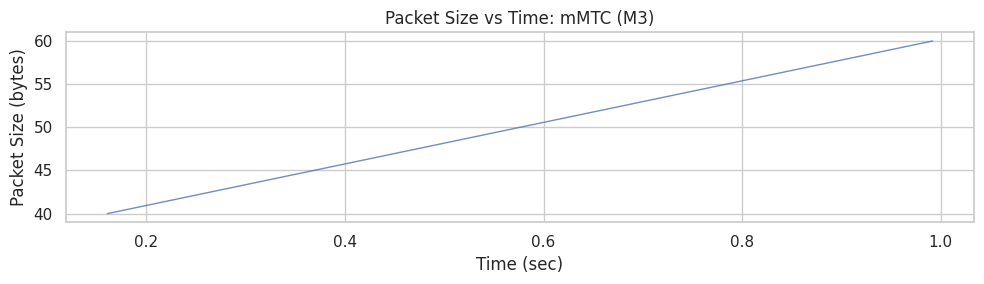

In [24]:
# ======================================================
# 4. Packet Size vs Time (per Machine) – Continuous version
# ======================================================
ZOOM_END = 1  
for (slice_type, machine), group in trace_df.groupby(["slice", "machine"]):
    group = group[group["Time"] <= ZOOM_END].sort_values("Time")
    group = group.sort_values("Time")  # make sure time is ordered
    plt.figure(figsize=(10, 3))
    plt.plot(group["Time"], group["Length"], linewidth=1.0, alpha=0.8)
    plt.title(f"Packet Size vs Time: {slice_type} ({machine})")
    plt.xlabel("Time (sec)")
    plt.ylabel("Packet Size (bytes)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


### Aligned Plots

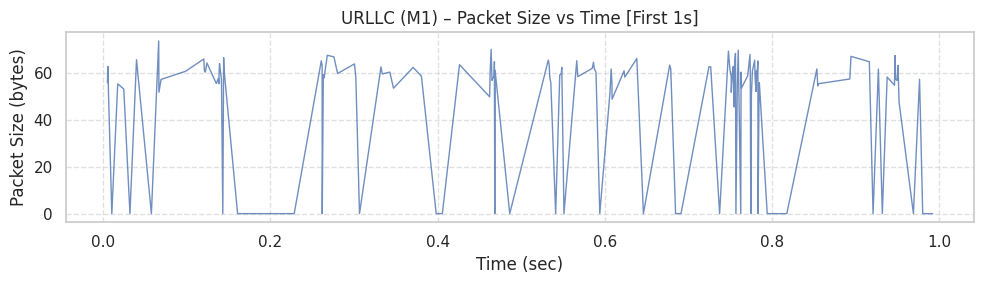

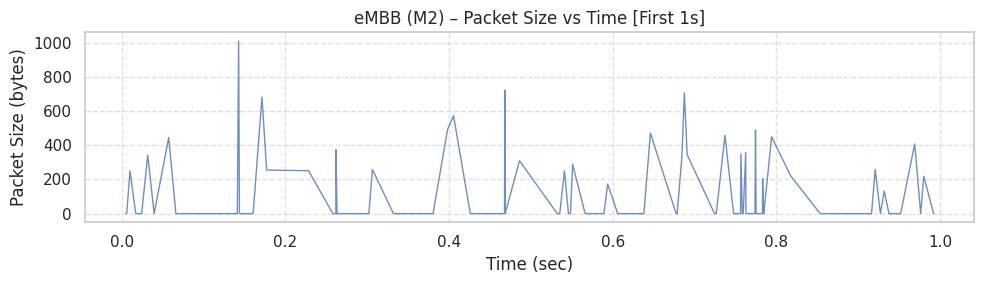

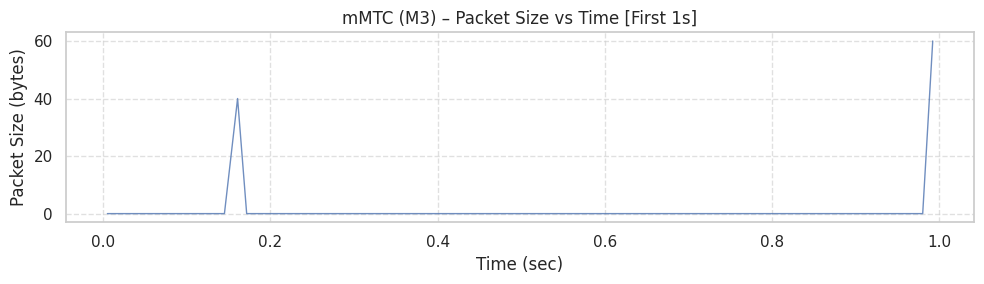

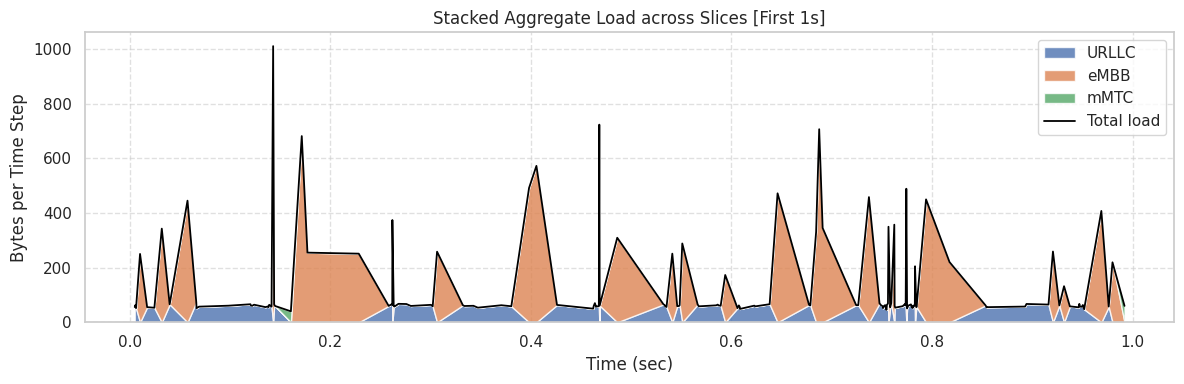

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

# ======================================================
# Configuration
# ======================================================
aligned_folder = "."      # folder containing *_aligned_trace_sec_test.csv
ZOOM_END = 1             # seconds (e.g., 0.1 for 100 ms, 10 for 10 s, etc.)
slices = ["URLLC", "eMBB", "mMTC"]

# ======================================================
# Collect all aligned CSVs
# ======================================================
aligned_files = sorted(glob.glob("*_aligned_trace_sec_test.csv"))
if not aligned_files:
    raise FileNotFoundError("No aligned CSVs found in current folder!")

# ======================================================
# 1️⃣ Per-slice continuous traces (packet size vs time)
# ======================================================
for file_path in aligned_files:
    df = pd.read_csv(file_path)
    fname = os.path.basename(file_path)
    slice_type = df["slice"].iloc[0]
    machine = df["machine"].iloc[0]
    df = df[df["Time"] <= ZOOM_END].sort_values("Time")

    if df.empty:
        continue

    plt.figure(figsize=(10, 3))
    plt.plot(df["Time"], df["Length"], linewidth=1.0, alpha=0.8)
    plt.title(f"{slice_type} ({machine}) – Packet Size vs Time [First {ZOOM_END}s]")
    plt.xlabel("Time (sec)")
    plt.ylabel("Packet Size (bytes)")
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.show()

# ======================================================
# 2️⃣ Stacked total load across all slices (URLLC + eMBB + mMTC)
# ======================================================
# Merge all aligned traces into one DataFrame
dfs = []
for f in aligned_files:
    df = pd.read_csv(f)
    df = df[df["Time"] <= ZOOM_END]
    dfs.append(df)
merged = pd.concat(dfs, ignore_index=True)

# Aggregate by time & slice
agg = merged.groupby(["Time", "slice"])["Length"].sum().unstack(fill_value=0)
agg["Total"] = agg.sum(axis=1)

plt.figure(figsize=(12, 4))
plt.stackplot(agg.index, agg["URLLC"], agg["eMBB"], agg["mMTC"],
              labels=["URLLC", "eMBB", "mMTC"], alpha=0.8)
plt.plot(agg.index, agg["Total"], color="black", linewidth=1.3, label="Total load")
plt.title(f"Stacked Aggregate Load across Slices [First {ZOOM_END}s]")
plt.xlabel("Time (sec)")
plt.ylabel("Bytes per Time Step")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()
